In [45]:
%matplotlib inline
%run 'bin/notebook_utils.py'

In [46]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
sws_sessions = pd.read_csv('data/synapse/weak_scaling/sessions.csv', index_col=0)
sws_pilots = pd.read_csv('data/synapse/weak_scaling/pilots.csv', index_col=0)
sws_units = pd.read_csv('data/synapse/weak_scaling/units.csv', index_col=0)

# Analysis: Why we do not scale at 2048/65536 and 4096/131072 tasks/cores

In [47]:
# Load sessions for Synapse experiment 1
import os
print os.getcwd()
sras = load_sessions_units('data/synapse/weak_scaling', 
                     sws_sessions, 
                     sorted(sws_sessions.nunit.unique().tolist()))

/home/merzky/experiments/rp-paper-ipdps2018/analysis


In [52]:
# Common variables across plotting 
sessions = sws_sessions
units    = sws_units

dfs = list()
print sras.keys()
for key in sorted(sras.keys()):
    print key
    session  = sras[key][0]
    sid      = session._sid
    snunit   = sws_sessions.loc[session._sid].nunit
    sncore   = sws_sessions.loc[session._sid].ncore
    muetime  = (units.AGENT_STAGING_OUTPUT_PENDING - units.AGENT_EXECUTING).mean()

    # Set common title components
    title_head = 'ORNL Titan: Analysis of Weak Scalability'
    title_exec = '\\textbf{Executable}: Synapse emulating Gromacs simulations of BPTI protein with \#atoms'
    title_conf = '\\textbf{Configuration}: 1 Executor; Orte; OpenMPI commit \#'
    title_work = '\\textbf{Workload}: %s: \\textbf{%s tasks}; ?? cores/task; %s cores; $\\approx$??s/task' % (sid.replace('_', '\_'), snunit, sncore)#, muetime

  # Get events and order them by Scheduling
    df = get_df_unit_events(session)
    df = df.sort_values(by='Scheduler Queues CU')
    df = df.reset_index(drop=True)
    dfs.append(df)

[32, 64, 4096, 1024, 128, 256, 512, 2048]
32
64
128
256
512
1024
2048
4096


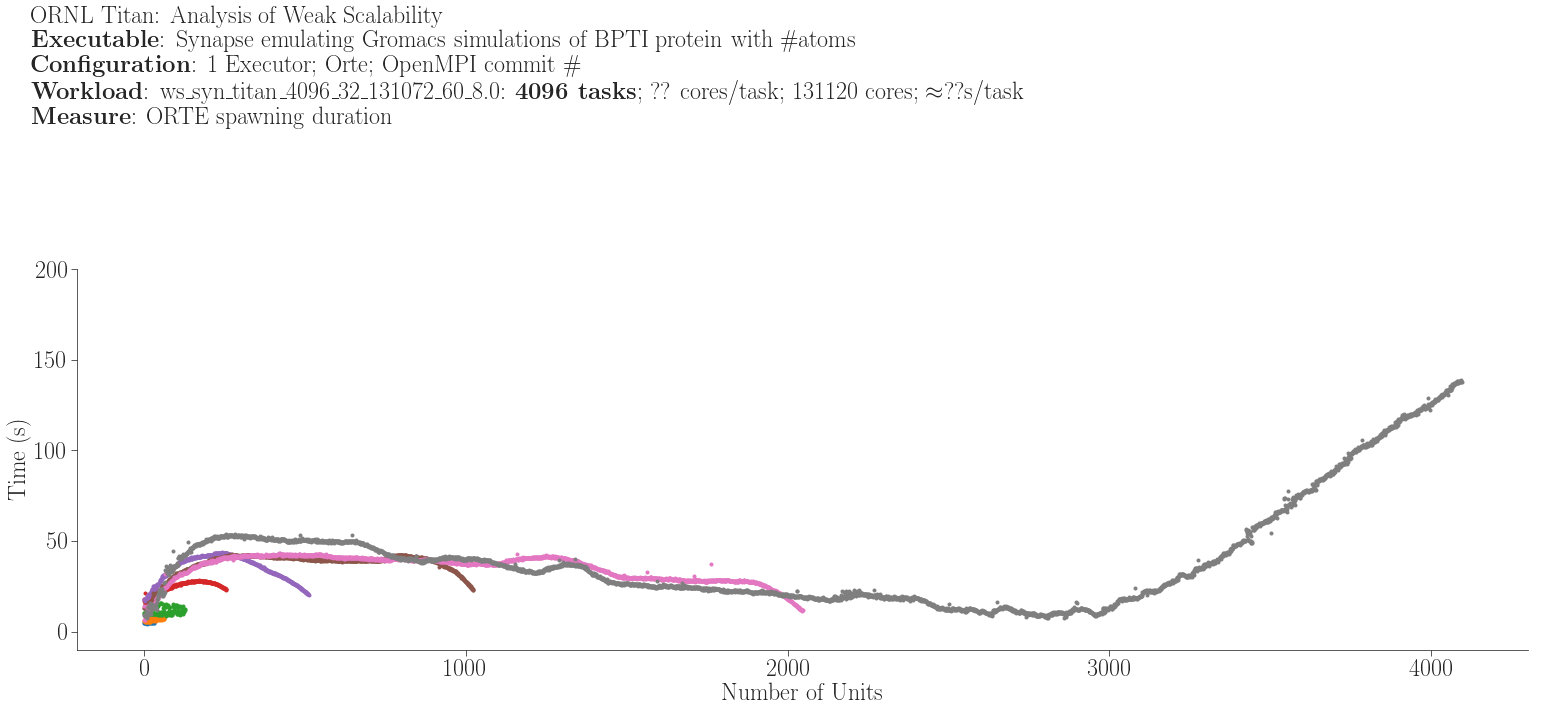

In [54]:
fig, ax  = fig_hdouble_setup()

title_desc = '\\textbf{Measure}: ORTE spawning duration'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.1, y=1.4, horizontalalignment='left')

for df in dfs:
    plt.scatter(df['CU Spawns Executable'].index       , df['Executable Starts']-df['CU Spawns Executable'], marker='.') # CU script [orterun spawner]

plt.legend(ncol=5, loc='upper left', bbox_to_anchor=(0,1.35))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')
plt.ylim([-10,200])

plt.savefig('figures/titan_synapse_strong_scaling_orte_spawning.pdf', dpi=300, bbox_inches='tight')

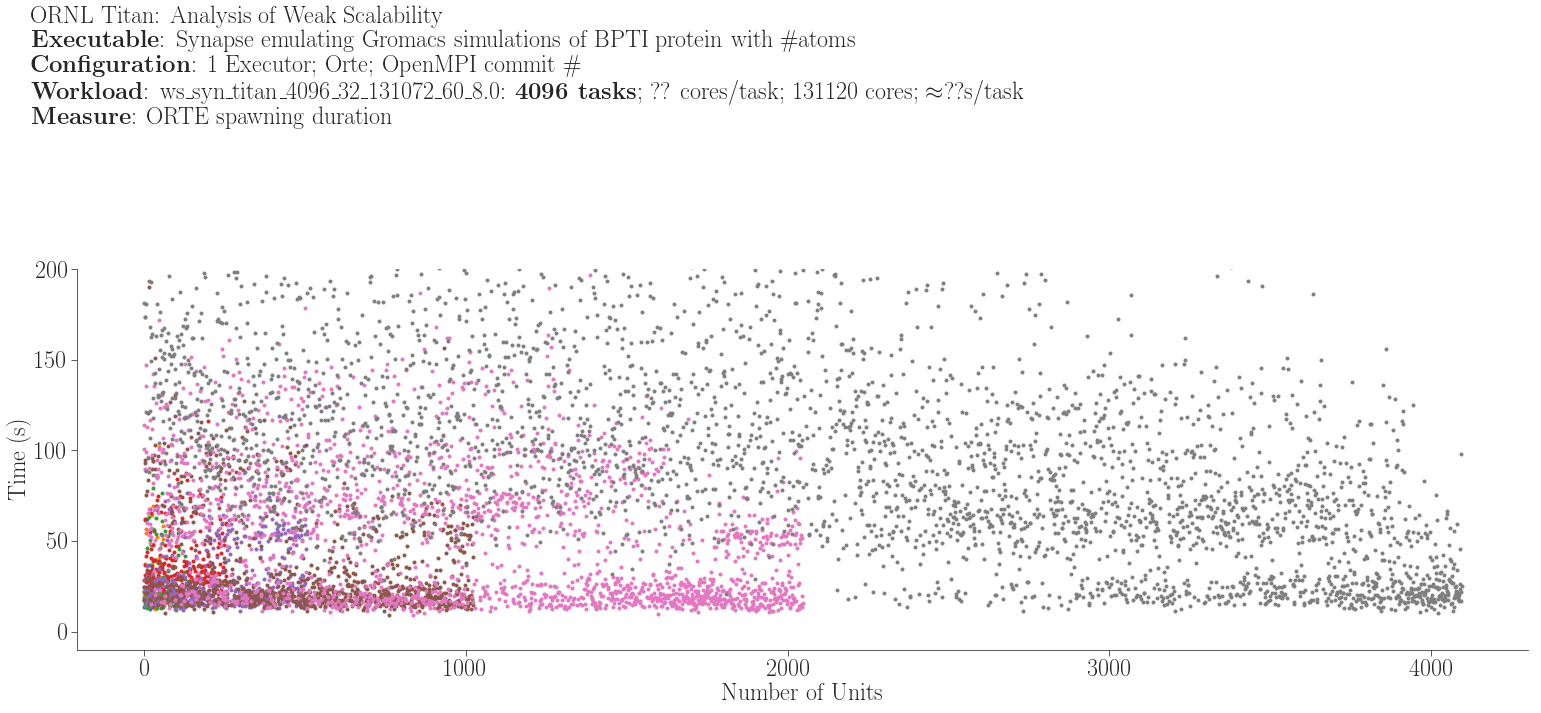

In [55]:
fig, ax  = fig_hdouble_setup()

title_desc = '\\textbf{Measure}: ORTE spawning duration'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.1, y=1.4, horizontalalignment='left')

for df in dfs:
    plt.scatter(df['CU Spawns Executable'].index       , df['CU Spawn Returns']-df['Executable Stops'], marker='.') # CU script [orterun spawner]

plt.legend(ncol=5, loc='upper left', bbox_to_anchor=(0,1.35))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')
plt.ylim([-10,200])

plt.savefig('figures/titan_synapse_strong_scaling_orte_collecting.pdf', dpi=300, bbox_inches='tight')